Mega Dewi Giridrawardani

# Content Based Filtering

## Data Loading

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/dataset/book')
!ls -a

Books.csv  Ratings.csv	Users.csv


### Load Dataset

In [ ]:
book = pd.read_csv('/content/drive/MyDrive/dataset/book/Books.csv')
rating = pd.read_csv('/content/drive/MyDrive/dataset/book/Ratings.csv')
user = pd.read_csv('/content/drive/MyDrive/dataset/book/Users.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Eksplorasi Data


### melihat informasi mengenai dataset book

In [ ]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
book = book.rename(columns={'Book-Title': 'book_title', 'Book-Author' : 'book_author', 'Year-Of-Publication':'year_of_publication', 'Publisher':'publisher', 'Image-URL-S': 'image_url_s', 'Image-URL-M': 'image_url_m', 'Image-URL-L': 'image_url_l'})
book.head(2)

,ISBN,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


### melihat informasi mengenai dataset rating

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
rating = rating.rename(columns={'User-ID': 'user_id', 'Book-Rating' : 'book_rating'})
rating.head(2)

,user_id,ISBN,book_rating
0,276725,034545104X,0
1,276726,0155061224,5


### melihat informasi mengenai dataset user

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
user = user.rename(columns={'User-ID': 'user_id', 'Location' : 'location', 'Age' : 'age'})
user.head(2)

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


### Melihat jumlah data dari masing masing dataset

Untuk melihat jumlah data dapat menggunakan fungsi len. 
*   Pada data book digunakan fitur ISBN
*   Pada data rating digunakan fitur user_id
*   Pada data user digunakan fitur user_id



In [ ]:
print('Jumlah data buku : ',len(book.ISBN.unique()))
print('Jumlah data penilaian buku  : ',len(rating.user_id.unique()))
print('Jumlah data user : ',len(user.user_id.unique()))

Jumlah data buku :  271360
Jumlah data penilaian buku  :  105283
Jumlah data user :  278858


## Preprocessing Data

### Menggabungkan data book dan rating dengan fungsi merge


In [ ]:
book = book.merge(rating, on='ISBN', how='left')
book.head()

,ISBN,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0


### Cek missing value dengan fungsi isnull()

In [ ]:
book.isnull().sum()

ISBN                      0
book_title                0
book_author               1
year_of_publication       0
publisher                 2
image_url_s               0
image_url_m               0
image_url_l               4
user_id                1209
book_rating            1209
dtype: int64

### Menghapus missing value dengan fungsi dropna() dan disimpan dalam variabel all_book

In [ ]:
all_book = book.dropna()
all_book

,ISBN,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1032340,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463.0,7.0
1032341,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579.0,4.0
1032342,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680.0,0.0
1032343,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680.0,0.0


### Cek kembali missing value setelah dihilangkan

In [ ]:
all_book.isnull().sum()

ISBN                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
image_url_s            0
image_url_m            0
image_url_l            0
user_id                0
book_rating            0
dtype: int64

### Melihat informasi mengenai all_book

In [ ]:
all_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031129 entries, 0 to 1032344
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031129 non-null  object 
 1   book_title           1031129 non-null  object 
 2   book_author          1031129 non-null  object 
 3   year_of_publication  1031129 non-null  object 
 4   publisher            1031129 non-null  object 
 5   image_url_s          1031129 non-null  object 
 6   image_url_m          1031129 non-null  object 
 7   image_url_l          1031129 non-null  object 
 8   user_id              1031129 non-null  float64
 9   book_rating          1031129 non-null  float64
dtypes: float64(2), object(8)
memory usage: 86.5+ MB


### Cek jumlah dari value dari ISBN pada data all_book

In [ ]:
len(all_book.ISBN.unique())

270145

In [ ]:
all_book[all_book['book_author'] == 'Plato']

,ISBN,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating
54154,0872203492,Plato Complete Works,Plato,1997,Hackett Publishing Company,http://images.amazon.com/images/P/0872203492.0...,http://images.amazon.com/images/P/0872203492.0...,http://images.amazon.com/images/P/0872203492.0...,805.0,0.0
54155,0872203492,Plato Complete Works,Plato,1997,Hackett Publishing Company,http://images.amazon.com/images/P/0872203492.0...,http://images.amazon.com/images/P/0872203492.0...,http://images.amazon.com/images/P/0872203492.0...,29743.0,10.0
54156,0872203492,Plato Complete Works,Plato,1997,Hackett Publishing Company,http://images.amazon.com/images/P/0872203492.0...,http://images.amazon.com/images/P/0872203492.0...,http://images.amazon.com/images/P/0872203492.0...,167779.0,9.0
181415,014044582X,The Last Days of Socrates: Euthyphro/Apology/C...,Plato,1995,Penguin Books,http://images.amazon.com/images/P/014044582X.0...,http://images.amazon.com/images/P/014044582X.0...,http://images.amazon.com/images/P/014044582X.0...,4835.0,0.0
181416,014044582X,The Last Days of Socrates: Euthyphro/Apology/C...,Plato,1995,Penguin Books,http://images.amazon.com/images/P/014044582X.0...,http://images.amazon.com/images/P/014044582X.0...,http://images.amazon.com/images/P/014044582X.0...,25041.0,10.0
...,...,...,...,...,...,...,...,...,...,...
993019,0198720491,Phaedo (Clarendon Plato Series),Plato,1983,Oxford University Press,http://images.amazon.com/images/P/0198720491.0...,http://images.amazon.com/images/P/0198720491.0...,http://images.amazon.com/images/P/0198720491.0...,251613.0,0.0
993021,0226042758,Plato's Symposium,Plato,2001,University of Chicago Press,http://images.amazon.com/images/P/0226042758.0...,http://images.amazon.com/images/P/0226042758.0...,http://images.amazon.com/images/P/0226042758.0...,251613.0,0.0
1020264,082831456X,Symposium of Plato,Plato,1996,Branden Books,http://images.amazon.com/images/P/082831456X.0...,http://images.amazon.com/images/P/082831456X.0...,http://images.amazon.com/images/P/082831456X.0...,211426.0,0.0
1028380,0872205541,The Trial and Death of Socrates (3rd Edition),Plato,2001,Hackett Pub Co Inc,http://images.amazon.com/images/P/0872205541.0...,http://images.amazon.com/images/P/0872205541.0...,http://images.amazon.com/images/P/0872205541.0...,235842.0,0.0


### Menghapus data duplikat 

In [ ]:
all_book = all_book.drop_duplicates('ISBN')
all_book

,ISBN,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
15,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8.0,0.0
18,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8.0,0.0
29,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1032340,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463.0,7.0
1032341,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579.0,4.0
1032342,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680.0,0.0
1032343,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680.0,0.0


## Data Preparation

### Mengurangi data dengan mengambil buku dengan rating antara 5 sampai 8

In [ ]:
all_book = all_book[(all_book['book_rating'] > 5.0) & (all_book['book_rating'] < 8.0)]
all_book

,ISBN,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating
95,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,1994,River City Pub,http://images.amazon.com/images/P/1881320189.0...,http://images.amazon.com/images/P/1881320189.0...,http://images.amazon.com/images/P/1881320189.0...,8.0,7.0
3895,0375759778,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,19.0,7.0
3931,3404921038,Wie Barney es sieht.,Mordecai Richler,2002,LÃ?Â¼bbe,http://images.amazon.com/images/P/3404921038.0...,http://images.amazon.com/images/P/3404921038.0...,http://images.amazon.com/images/P/3404921038.0...,22.0,7.0
4867,0553582747,From the Corner of His Eye,Dean Koontz,2001,Bantam Books,http://images.amazon.com/images/P/0553582747.0...,http://images.amazon.com/images/P/0553582747.0...,http://images.amazon.com/images/P/0553582747.0...,42.0,7.0
5235,042518630X,Purity in Death,J.D. Robb,2002,Berkley Publishing Group,http://images.amazon.com/images/P/042518630X.0...,http://images.amazon.com/images/P/042518630X.0...,http://images.amazon.com/images/P/042518630X.0...,278418.0,7.0
...,...,...,...,...,...,...,...,...,...,...
1032265,1578567475,Hyperlinkz Book 1 : Digital Disaster (Hyperlinkz),ROBERT ELMER,2004,WaterBrook Press,http://images.amazon.com/images/P/1578567475.0...,http://images.amazon.com/images/P/1578567475.0...,http://images.amazon.com/images/P/1578567475.0...,269557.0,7.0
1032314,8420614556,Lewis Carroll: A Traves Del Espejo Y Lo Que Al...,Lewis Carroll,1986,Lectorum Pubns (Adult),http://images.amazon.com/images/P/8420614556.0...,http://images.amazon.com/images/P/8420614556.0...,http://images.amazon.com/images/P/8420614556.0...,274144.0,7.0
1032315,3320016822,Urteil ohne Prozess: Margot Honecker gegen Oss...,JÃ¶rn Kalkbrenner,1990,Dietz,http://images.amazon.com/images/P/3320016822.0...,http://images.amazon.com/images/P/3320016822.0...,http://images.amazon.com/images/P/3320016822.0...,274220.0,7.0
1032337,1845170423,Cocktail Classics,David Biggs,2004,Connaught,http://images.amazon.com/images/P/1845170423.0...,http://images.amazon.com/images/P/1845170423.0...,http://images.amazon.com/images/P/1845170423.0...,275970.0,7.0


### Mengkonversi data menjadi list dengan tolist()

In [ ]:
book_id = all_book['ISBN'].tolist()
book_title = all_book['book_title'].tolist()
book_author = all_book['book_author'].tolist()

print(len(book_id))
print(len(book_title))
print(len(book_author))

17787
17787
17787


### Membuat dictionary untuk menentukan pasangan key-value pada data book_id, book_title, dan book_author

In [ ]:
book_new = pd.DataFrame({
          'ISBN' : book_id,
          'title' : book_title,
          'author' : book_author
          })
book_new

,ISBN,title,author
0,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver
1,0375759778,Prague : A Novel,ARTHUR PHILLIPS
2,3404921038,Wie Barney es sieht.,Mordecai Richler
3,0553582747,From the Corner of His Eye,Dean Koontz
4,042518630X,Purity in Death,J.D. Robb
...,...,...,...
17782,1578567475,Hyperlinkz Book 1 : Digital Disaster (Hyperlinkz),ROBERT ELMER
17783,8420614556,Lewis Carroll: A Traves Del Espejo Y Lo Que Al...,Lewis Carroll
17784,3320016822,Urteil ohne Prozess: Margot Honecker gegen Oss...,JÃ¶rn Kalkbrenner
17785,1845170423,Cocktail Classics,David Biggs


## Model Development

### Vektorisasi dengan TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data penulis
tf.fit(book_new['author']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names()  

['1929',
 '1988',
 'aa',
 'aaa',
 'aaron',
 'aarsen',
 'ab',
 'abbagnano',
 'abbey',
 'abbie',
 'abbott',
 'abby',
 'abd',
 'abdul',
 'abdullah',
 'abel',
 'abello',
 'aber',
 'abigail',
 'abra',
 'abraham',
 'abrahams',
 'abrams',
 'abresch',
 'abreu',
 'abrev',
 'abshire',
 'abu',
 'ace',
 'achcar',
 'achebe',
 'achy',
 'ackerman',
 'ackroyd',
 'acquaroni',
 'aczel',
 'ad',
 'adair',
 'adam',
 'adamo',
 'adamov',
 'adams',
 'adamson',
 'adapter',
 'addis',
 'addison',
 'adele',
 'adeline',
 'adelle',
 'ades',
 'adib',
 'adin',
 'adkins',
 'adler',
 'adnre',
 'adolf',
 'adolfo',
 'adolphe',
 'adolphus',
 'adriaan',
 'adrian',
 'adriane',
 'adrienne',
 'adã',
 'aeleen',
 'aero',
 'aeron',
 'afanasyev',
 'afua',
 'agatha',
 'agatston',
 'agee',
 'agel',
 'agencies',
 'agile',
 'aglaja',
 'agnes',
 'agualusa',
 'aguiar',
 'aguilera',
 'aguinis',
 'agusti',
 'ah',
 'ahd',
 'ahdaf',
 'ahl',
 'ahlberg',
 'ahmad',
 'ahmed',
 'aicher',
 'aigner',
 'aiken',
 'aikman',
 'aileen',
 'aimee',
 'ai

### Fit dan tranformasikan hasil vektorisasi ke bentuk matriks

In [ ]:
tfidf_matrix = tf.fit_transform(book_new['author']) 
tfidf_matrix.shape 

(17787, 10763)

### Mengubah vektor TF-IDF dalam bentuk matriks dengan fungsi todense()

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Membuat dataframe untuk melihat tf-idf matrix

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=book_new.title
).sample(22, axis=1).sample(10, axis=0)

,tarpinian,smadja,brooke,zquez,smercek,ely,babson,deniz,fuyumi,leena,malouf,thiessen,kalle,joel,ghedira,spruch,fisk,cook,chryssa,allon,decosse,marco
title,,,,,,,,,,,,,,,,,,,,,,
America from the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AstÃ©rix gladiateur (Une Aventure d'AstÃ©rix),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Chica del Guardarropa, La",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
What If? Fifty Discoveries That Changed the World,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agobios nos da la vida: Sabios consejos para torear los problemas del dÃ­a a dÃ­a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O clube das chaves entra em acÃ§Ã£o,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
How to Murder Your Mother-In-Law,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gillian Ayres,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Terrible Times (Eddie Dickens Trilogy S.),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Menghitung Cosine Similariity pada matriks TF-IDF

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul buku dan Melihat similarity matrix pada setiap buku

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=book_new['title'], columns=book_new['title'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (17787, 17787)


title,The Mythic Past: Biblical Archaeology and the Myth of Israel,"Sundance, Butch and Me",Hunter's Touch,"The Beast, the Eunuch and the Glass-Eyed Child: Television in the 80's and Beyond","Tongue Fu! : How to Deflect, Disarm, and Defuse Any Verbal Conflict"
title,,,,,
Advanced Backstabbing and Mudslinging Techniques,0.0,0.0,0.0,0.0,0.0
How Things Work: The Universal Encyclopedia of Machines,0.0,0.0,0.0,0.0,0.0
The Courage to Write: How Writers Transcend Fear,0.0,0.0,0.0,0.0,0.0
Coming Up: The Worlds Best Erotic Writing 1995,0.0,0.0,0.0,0.0,0.0
Der ehrenwerte MÃ?Â¶rder. Ein Coq- Rouge- Thriller.,0.0,0.0,0.0,0.0,0.0
Romancero gitano ; Poema del cante jondo (Selecciones Austral ; 39 : PoesÃ­a),0.0,0.0,0.0,0.0,0.0
"TWIST OF FATE: DISTRESS CALL 911 #1 (Distress Call 911, No 1)",0.0,0.0,0.0,0.0,0.0
Sams Teach Yourself Python in 24 Hours (Teach Yourself -- 24 Hours),0.0,0.0,0.0,0.0,0.0
One of Our Submarines (Wordsworth Collection),0.0,0.0,0.0,0.0,0.0


##Mendapatkan Rekomendasi Buku

### Membuat fungsi book_recommendations dengan beberapa parameter sebagai berikut:


*   judul_buku : Judul buku
*   similiarity_data : Dataframe mengenai similarity yang telah kita definisikan sebelumnya.
*   items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘title’ dan ‘author’.
*   k : Banyak rekomendasi yang diberikan


In [ ]:
def book_recommendations(judul_buku, similarity_data=cosine_sim_df, items=book_new[['title', 'author']], k=5):
    index = similarity_data.loc[:,judul_buku].to_numpy().argpartition(
        range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(judul_buku, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

### Melihat informasi mengenai buku The Firm

In [ ]:
book_new[book_new.title.eq('The Firm')]

,ISBN,title,author
8482,044021145x,The Firm,John Grisham


### Mendapatkan 5 rekomendasi buku yang mirip dengan buku The Firm

In [ ]:
pred = book_recommendations('The Firm')
pred

,title,author
0,The Partner,John Grisham
1,The Partner,John Grisham
2,The Testament,John Grisham
3,Skipping Christmas,JOHN GRISHAM
4,Skipping Christmas,John Grisham


## Evaluasi Model 

### Menghitung nilai presisi

In [ ]:
a = len(pred[(pred.author == 'John Grisham') + (pred.author == 'JOHN GRISHAM')])
b = len(pred['author'])

precision = a/b

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [ ]:
#menampilkan hasil
precision

1.0

#Collaborative Based Filtering

## Data Understanding

### Import Library

In [ ]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

### Membaca dataset dengan mengambil data yang memiliki rating 5 hingga 8

In [ ]:
rating = rating[(rating['book_rating'] > 5) & rating['book_rating'] < 8]
rating

,user_id,ISBN,book_rating
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10
...,...,...,...
1149771,276704,0743211383,7
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


## Data Preparation

### Proses Encoding fitur user_id pada data rating

In [ ]:
user_ids = rating['user_id'].unique().tolist()
print('list userID: ', user_ids)
 
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [276729, 276736, 276737, 276744, 276745, 276747, 276748, 276751, 276754, 276760, 276762, 276772, 276774, 276780, 276786, 276788, 276798, 276800, 276804, 276808, 276811, 276812, 276813, 276814, 276820, 276822, 276827, 276828, 276830, 276835, 276842, 276847, 276848, 276850, 276853, 276857, 276859, 276861, 276862, 276863, 276866, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276949, 276953, 276954, 276957, 276959, 276964, 276965, 276984, 276986, 276988, 276990, 276992, 276994, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277023, 277028, 277031, 277032, 277036, 277042, 277048, 277051, 277052, 277053, 277056, 277058, 277072, 277085, 277087, 277094, 277096, 277107, 277116, 277124, 277128, 277129, 277134, 277135, 277139, 277143, 277157, 277159, 277165, 277168, 277170, 277171, 277179, 277186, 277187, 277188, 277189, 277195, 277196, 2

### Proses Encoding fitur ISBN pada data rating

In [ ]:
book_ids = rating['ISBN'].unique().tolist()
 
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
 
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}
 
rating['user'] = rating['user_id'].map(user_to_user_encoded)
rating['book'] = rating['ISBN'].map(book_to_book_encoded)

### Mengubah nilai rating menjadi float dan menampilkan beberapa nilai seperti  jumlah user, jumlah buku, serta nilai minimum dan maksimum rating

In [ ]:
num_users = len(user_to_user_encoded)
print(num_users)
 
num_book = len(book_encoded_to_book)
print(num_book)

rating['book_rating'] = rating['book_rating'].values.astype(np.float32)
min_rating = min(rating['book_rating'])
max_rating = max(rating['book_rating'])
 
print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

69775
159323
Number of User: 69775, Number of Book: 159323, Min Rating: 6.0, Max Rating: 10.0


### Membagi Data untuk Training dan Validasi

#### Mengacak dataset

In [ ]:
rating = rating.sample(frac=1, random_state=42)
rating

,user_id,ISBN,book_rating,user,book
221199,51883,0373441525,10.0,13583,48051
94114,21014,0743222946,6.0,5636,25272
1120029,268734,0060974109,8.0,67823,141334
795493,192460,055329315X,10.0,48713,19366
645808,156150,0451523202,9.0,39772,40868
...,...,...,...,...,...
360916,87051,0385265700,10.0,22465,4758
795079,192244,0316777730,10.0,48655,2631
395510,95359,0060977337,8.0,24620,6218
426915,101876,0440213525,8.0,26220,6920


#### Mendefinisikan Variabel x dan y

In [ ]:
x = rating[['user', 'book']].values
y = rating['book_rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
train_indices = int(0.8 * rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 13583  48051]
 [  5636  25272]
 [ 67823 141334]
 ...
 [ 24620   6218]
 [ 26220   6920]
 [ 22864  71922]] [1.  0.  0.5 ... 0.5 0.5 1. ]


## Proses Training

### Membuat class RecommenderNet dari keras model class

In [ ]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.book_embedding = layers.Embedding( 
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0]) 
    book_vector = self.book_embedding(inputs[:, 1]) 
    book_bias = self.book_bias(inputs[:, 1]) 
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) 

### Compile model

In [ ]:
model = RecommenderNet(num_users, num_book, 50) 
 
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

### Fit model

In [ ]:
#model fit
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 15,
    validation_data = (x_val, y_val)
)

Epoch 1/15
36327/36327 [==============================] - 513s 14ms/step - loss: 0.6378 - root_mean_squared_error: 0.2785 - val_loss: 0.6465 - val_root_mean_squared_error: 0.2862
Epoch 2/15
36327/36327 [==============================] - 514s 14ms/step - loss: 0.6259 - root_mean_squared_error: 0.2687 - val_loss: 0.6439 - val_root_mean_squared_error: 0.2842
Epoch 3/15
36327/36327 [==============================] - 512s 14ms/step - loss: 0.6171 - root_mean_squared_error: 0.2613 - val_loss: 0.6429 - val_root_mean_squared_error: 0.2834
Epoch 4/15
36327/36327 [==============================] - 520s 14ms/step - loss: 0.6099 - root_mean_squared_error: 0.2550 - val_loss: 0.6427 - val_root_mean_squared_error: 0.2832
Epoch 5/15
36327/36327 [==============================] - 523s 14ms/step - loss: 0.6039 - root_mean_squared_error: 0.2498 - val_loss: 0.6429 - val_root_mean_squared_error: 0.2832
Epoch 6/15
36327/36327 [==============================] - 509s 14ms/step - loss: 0.5986 - root_mean_squar

##Visualiasasi Metriks

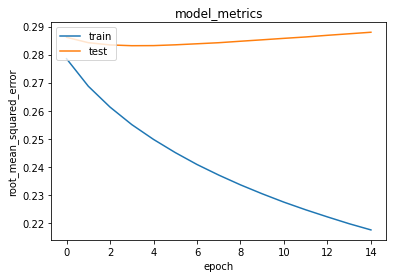

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Mendapatkan Rekomendasi Buku

In [ ]:
book_df = book_new
df = pd.read_csv('/content/drive/MyDrive/dataset/book/Ratings.csv')
df = df.rename(columns={'User-ID': 'user_id', 'Book-Rating' : 'book_rating'})
df = df.head(1000)

user_id = df.user_id.sample(1).iloc[0]
book_read_by_user = df[df.user_id == user_id]

book_not_read = book_df[~book_df['ISBN'].isin(book_read_by_user.ISBN.values)]['ISBN'] 
book_not_read = list(
    set(book_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_not_read = [[book_to_book_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

### Menggunakan fungsi predict() untuk memperoleh rekomendasi buku

In [ ]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_read[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)
 
top_book_user = (
    book_read_by_user.sort_values(
        by = 'book_rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = book_df[book_df['ISBN'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.title, ':', row.author)
 
print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)
 
recommended_book = book_df[book_df['ISBN'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.title, ':', row.author)

Showing recommendations for users: 277157
Book with high ratings from user
--------------------------------
Perish Twice : Robert B. Parker
The Devil's Code : John Sandford
Perchance to Dream : Robert B. Parker
--------------------------------
Top 10 book recommendation
--------------------------------
Dragonsong (Harper Hall Trilogy) : Anne McCaffrey
The Sinner : TESS GERRITSEN
Something Under the Bed Is Drooling : Bill Watterson
Portrait in Sepia : A Novel : Isabel Allende
A Knight in Shining Armor : Jude Deveraux
A confederacy of dunces : John Kennedy Toole
The Monster at the End of This Book (Jellybean Books(Tm).) : Jon Stone
Dark Magic : Christine Feehan
The Fermata : Nicholson Baker
The Kid: What Happened After My Boyfriend and I Decided to Go Get Pregnant : An Adoption Story : Dan Savage
